# NLL Curves

In [11]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

/Users/hzabriskie/Documents/Music21/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [11]:
with open('learning_rates.txt', 'r') as f:
    lines = f.readlines()

In [12]:
values = []
for l in lines:
    if "," in l:
        values.append(map(float, l.split(",")))
    else:
        values.append(float(l))

learning_rates = []
sizes = []
nlls = []
for idx, v in enumerate(values):
    if idx % 21 == 0:
        learning_rates.append(v[1])
        sizes.append(v[0])
    elif idx % 21 == 1:
        nlls.append(values[idx:idx+20])
    else:
        pass

## Graph training error as a function of average NLL over epochs

### LR = learning rate {0.1, 0.01, 0.001}
### SZ = size of the hidden layer and the embedding size {100, 200, 250}

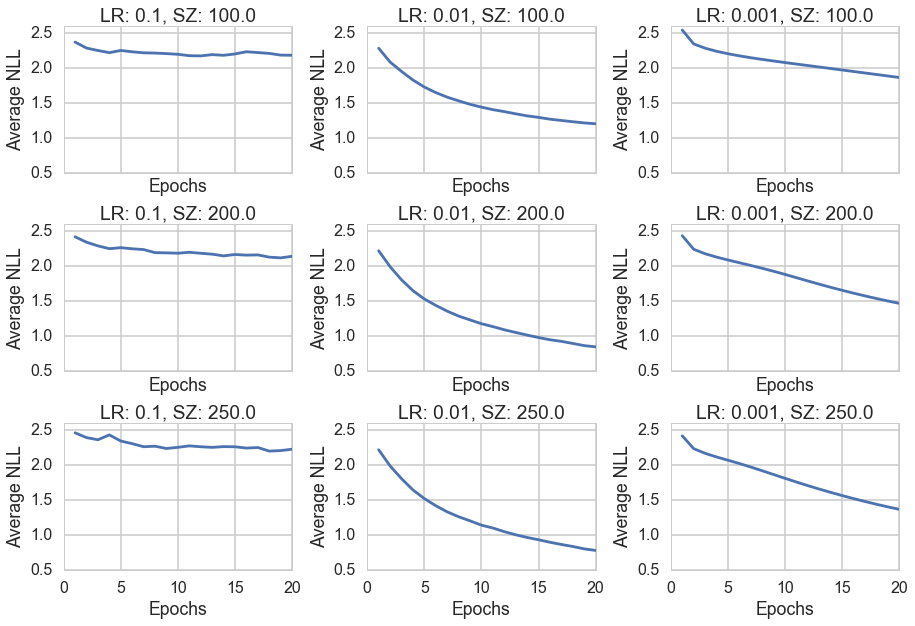

In [15]:
f, ax = plt.subplots(3,3, sharex=True)
X = range(1, 21)
for i in range(len(nlls)):
    a = ax[i / 3][i % 3]
    a.plot(X, nlls[i])
    a.set_title("LR: %s, SZ: %s" % (learning_rates[i], sizes[i]))
    a.set_ylabel("Average NLL")
    a.set_xlabel("Epochs")
    a.set_ylim([0.5, 2.6])
plt.tight_layout()

### Conclusion
Best performance with a larger embedding size (250) and a learning rate of 0.01. The concern now is overfitting.

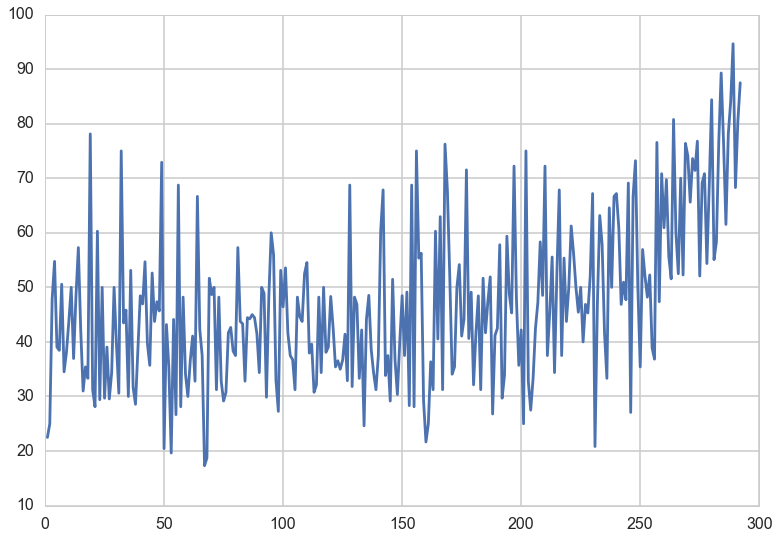

In [14]:
with open('test.txt', 'r') as f:
    data = f.readlines()

data = [x.split('\t')[:2] for x in data]
data = [(int(x), float(y)) for (x,y) in data]
x = [d[0] for d in data]
y = [d[1] for d in data]
plt.plot(x, y)